Multiple Linear Regression
ความถดถอยเชิงพหุ คือการอธิบายหาความสัมพันธ์ระหว่างเหตุและผล โดยกำหนดให้มีเหตุ (x) มากกว่าหนึ่งสาเหตุขึ้นไป และมีผล (y) หนึ่งผล โดยเขียนเป็นสมการได้ดังนี้ y = a + b1x1 + b2x2 + b3x3 + ... bnxn + e

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [34]:
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas  version: 2.3.1
numpy   version: 1.26.4
seaborn version: 0.13.2


In [35]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


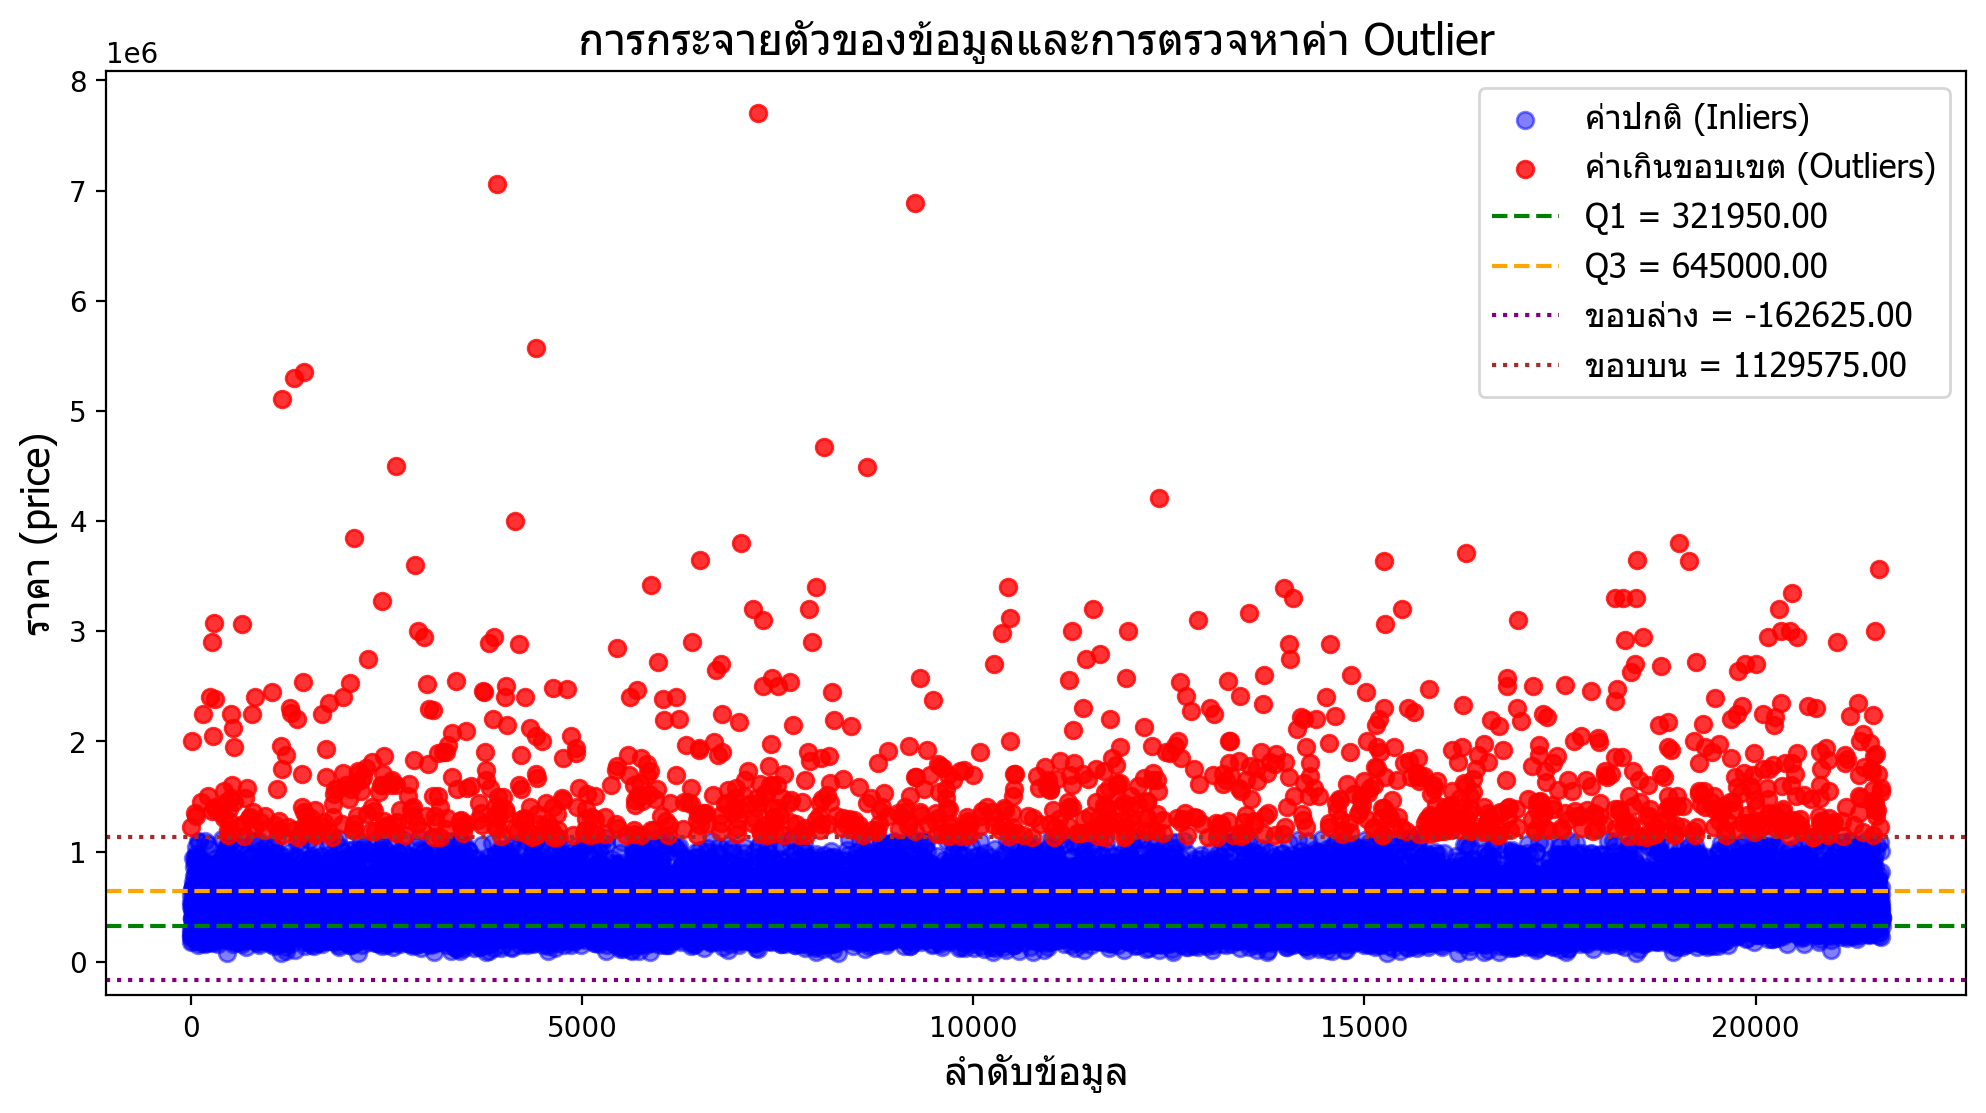

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดข้อมูล
df = pd.read_csv("kc_house_data.csv")

# เลือกคอลัมน์ที่ต้องการตรวจสอบ เช่น 'price'
col = 'price'

# คำนวณ Q1, Q3 และ IQR
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# กำหนดขอบเขตการหาค่า outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# แยกข้อมูลออกเป็น inliers และ outliers
inliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# สร้าง scatter plot
plt.figure(figsize=(12,6))
plt.scatter(inliers.index, inliers[col], color='blue', label='ค่าปกติ (Inliers)', alpha=0.5)
plt.scatter(outliers.index, outliers[col], color='red', label='ค่าเกินขอบเขต (Outliers)', alpha=0.8)

# วาดเส้นขอบ Q1, Q3
plt.axhline(y=Q1, color='green', linestyle='--', label=f'Q1 = {Q1:.2f}')
plt.axhline(y=Q3, color='orange', linestyle='--', label=f'Q3 = {Q3:.2f}')

# วาดเส้นขอบบน-ล่าง
plt.axhline(y=lower_bound, color='purple', linestyle=':', label=f'ขอบล่าง = {lower_bound:.2f}')
plt.axhline(y=upper_bound, color='brown', linestyle=':', label=f'ขอบบน = {upper_bound:.2f}')

# ตั้งค่าภาษาไทย
plt.title("การกระจายตัวของข้อมูลและการตรวจหาค่า Outlier", fontname="Tahoma", fontsize=16)
plt.xlabel("ลำดับข้อมูล", fontname="Tahoma", fontsize=14)
plt.ylabel("ราคา (price)", fontname="Tahoma", fontsize=14)
plt.legend(prop={"family":"Tahoma", "size":12})
plt.show()


ปรับค่า outliers เสร็จเรียบร้อยแล้ว

บันทึก DataFrame หลังปรับค่า outlier เป็น 'df_outlier_adjusted.csv' เรียบร้อยแล้ว



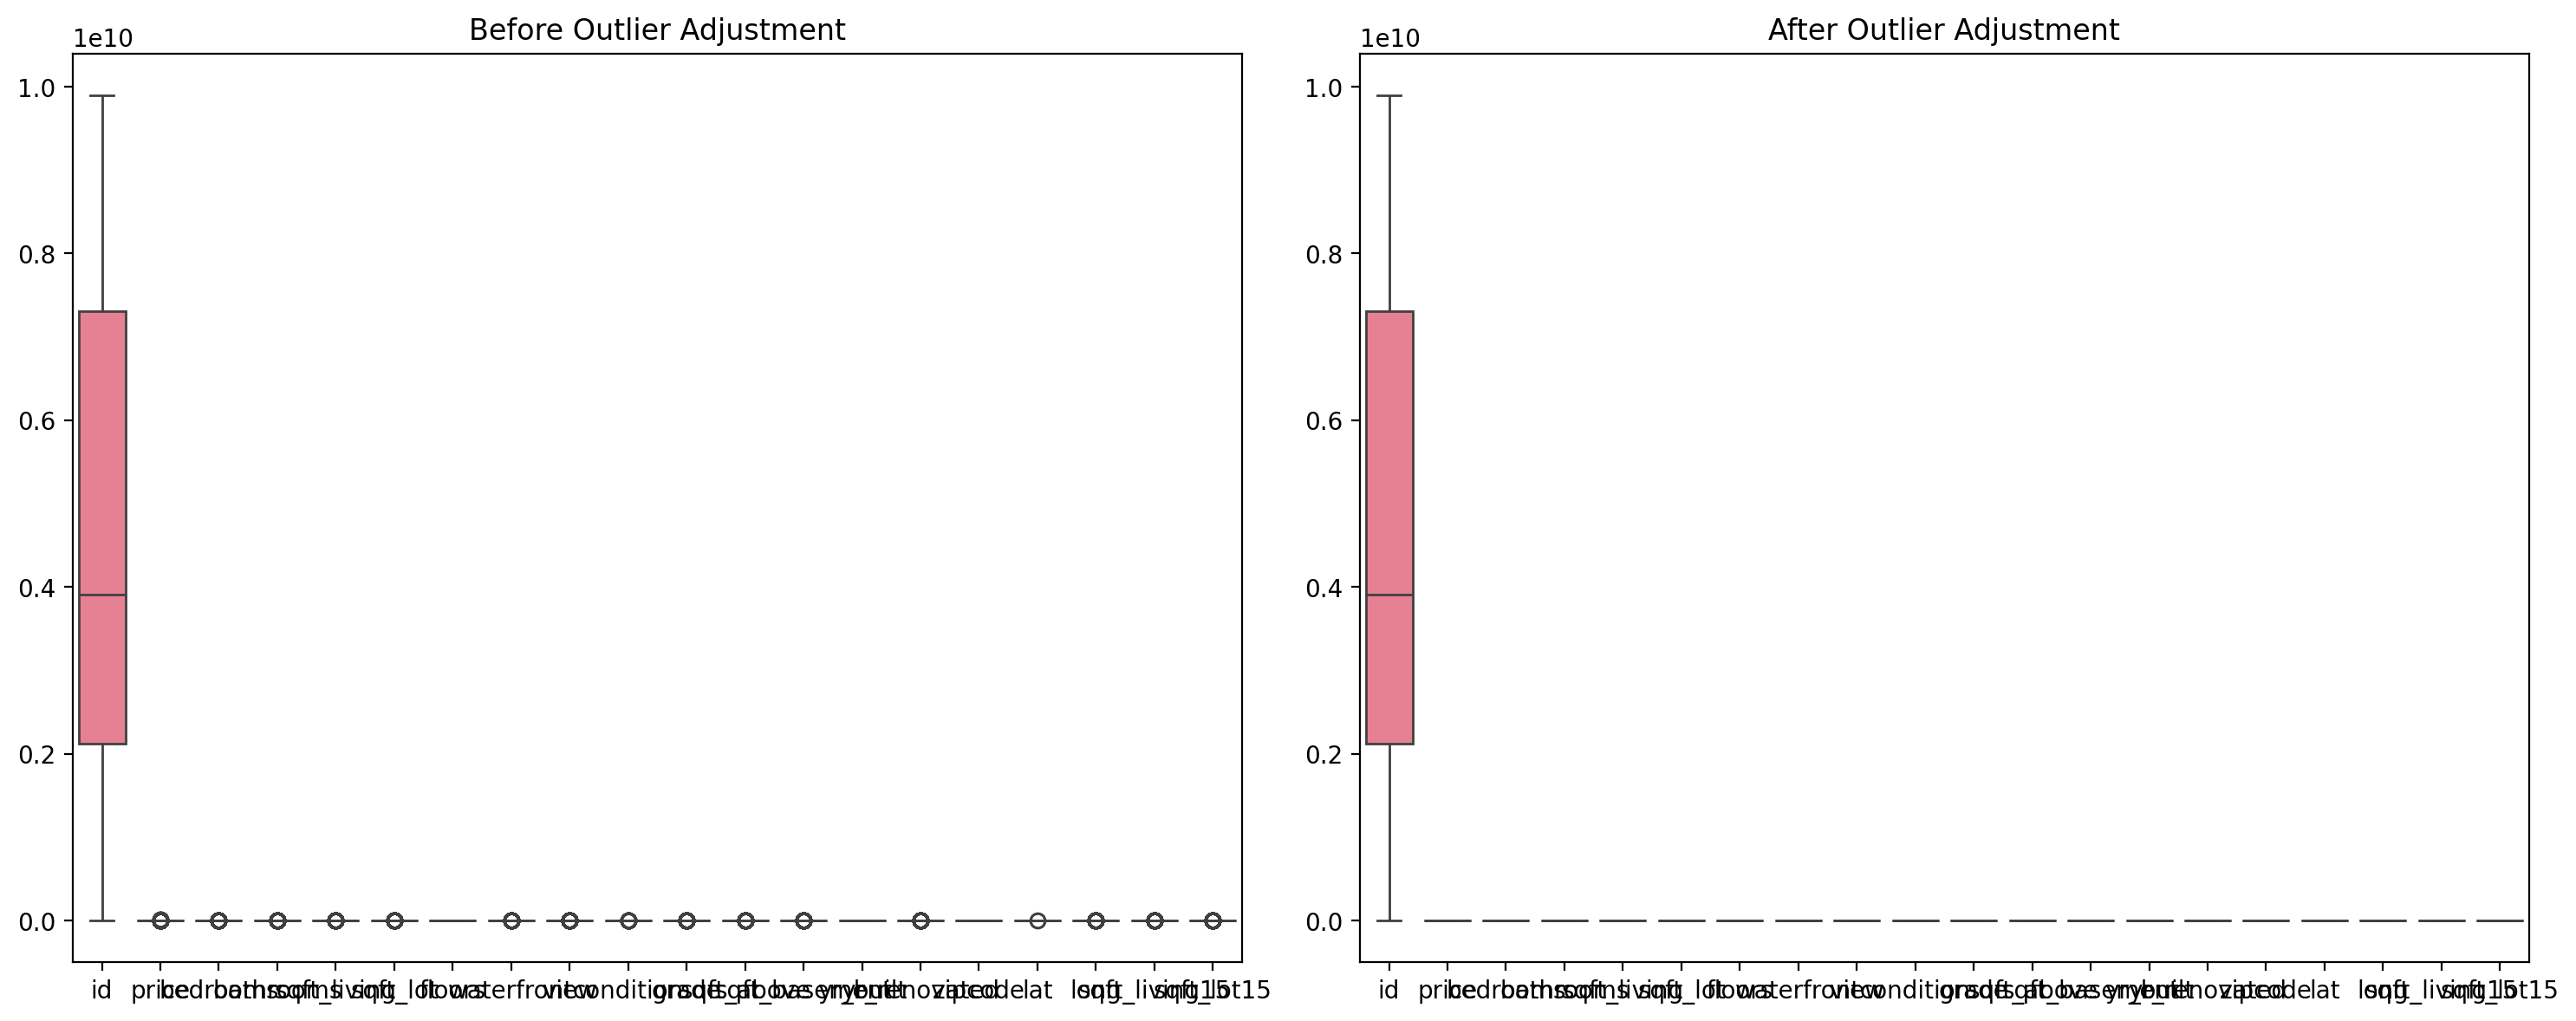

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# สมมติ df คือ DataFrame ของคุณ
df_numeric = df.select_dtypes(include=['number'])  # เลือกเฉพาะคอลัมน์ตัวเลข

# คำนวณ Q1, Q3 และ IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# กำหนด lower bound และ upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ปรับค่า outliers ให้เป็น boundary
df_capped = df_numeric.copy()
for col in df_numeric.columns:
    df_capped[col] = df_capped[col].clip(lower=lower_bound[col], upper=upper_bound[col])

# ถ้าต้องการเอากลับไป merge กับคอลัมน์ non-numeric
df_non_numeric = df.select_dtypes(exclude=['number'])
df_final = pd.concat([df_capped, df_non_numeric], axis=1)

print("ปรับค่า outliers เสร็จเรียบร้อยแล้ว\n")

# --- บันทึก DataFrame เป็น CSV ---
df_final.to_csv("df_outlier_adjusted.csv", index=False)
print("บันทึก DataFrame หลังปรับค่า outlier เป็น 'df_outlier_adjusted.csv' เรียบร้อยแล้ว\n")

# --- แสดงกราฟ Boxplot ก่อนและหลังปรับค่า outlier ---
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(data=df_numeric)
plt.title("Before Outlier Adjustment")

plt.subplot(1,2,2)
sns.boxplot(data=df_capped)
plt.title("After Outlier Adjustment")

plt.tight_layout()
plt.show()


In [38]:
df = pd.read_csv('df_outlier_adjusted.csv')
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,7129300520,221900.0,3.0,1.00,1180.0,5650,1.0,0,0,3.0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650.0,20141013T000000
1,6414100192,538000.0,3.0,2.25,2570.0,7242,2.0,0,0,3.0,...,2170,400,1951,0,98125,47.7210,-122.319,1690,7639.0,20141209T000000
2,5631500400,180000.0,2.0,1.00,770.0,10000,1.0,0,0,3.0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062.0,20150225T000000
3,2487200875,604000.0,4.0,3.00,1960.0,5000,1.0,0,0,5.0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000.0,20141209T000000
4,1954400510,510000.0,3.0,2.00,1680.0,8080,1.0,0,0,3.0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503.0,20150218T000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3.0,2.50,1530.0,1131,3.0,0,0,3.0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509.0,20140521T000000
21609,6600060120,400000.0,4.0,2.50,2310.0,5813,2.0,0,0,3.0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200.0,20150223T000000
21610,1523300141,402101.0,2.0,0.75,1020.0,1350,2.0,0,0,3.0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007.0,20140623T000000
21611,291310100,400000.0,3.0,2.50,1600.0,2388,2.0,0,0,3.0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287.0,20150116T000000


In [39]:
df = df.drop(['id'], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,221900.0,3.0,1.00,1180.0,5650,1.0,0,0,3.0,7.0,1180,0,1955,0,98178,47.5112,-122.257,1340,5650.0,20141013T000000
1,538000.0,3.0,2.25,2570.0,7242,2.0,0,0,3.0,7.0,2170,400,1951,0,98125,47.7210,-122.319,1690,7639.0,20141209T000000
2,180000.0,2.0,1.00,770.0,10000,1.0,0,0,3.0,6.0,770,0,1933,0,98028,47.7379,-122.233,2720,8062.0,20150225T000000
3,604000.0,4.0,3.00,1960.0,5000,1.0,0,0,5.0,7.0,1050,910,1965,0,98136,47.5208,-122.393,1360,5000.0,20141209T000000
4,510000.0,3.0,2.00,1680.0,8080,1.0,0,0,3.0,8.0,1680,0,1987,0,98074,47.6168,-122.045,1800,7503.0,20150218T000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530.0,1131,3.0,0,0,3.0,8.0,1530,0,2009,0,98103,47.6993,-122.346,1530,1509.0,20140521T000000
21609,400000.0,4.0,2.50,2310.0,5813,2.0,0,0,3.0,8.0,2310,0,2014,0,98146,47.5107,-122.362,1830,7200.0,20150223T000000
21610,402101.0,2.0,0.75,1020.0,1350,2.0,0,0,3.0,7.0,1020,0,2009,0,98144,47.5944,-122.299,1020,2007.0,20140623T000000
21611,400000.0,3.0,2.50,1600.0,2388,2.0,0,0,3.0,8.0,1600,0,2004,0,98027,47.5345,-122.069,1410,1287.0,20150116T000000


คำสั่งตรวจสอบว่ามีข้อมูลกี่แถวและกี่คอลัมน์

In [40]:
print(df.shape) 
print("ข้อมูลมีทั้งหมด",df.shape[0], "แถว","และมีคอลัมน์",df.shape[1],"คอลัมน์", "ได้แก่\n", df.columns)

(21613, 20)
ข้อมูลมีทั้งหมด 21613 แถว และมีคอลัมน์ 20 คอลัมน์ ได้แก่
 Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date'],
      dtype='object')


In [41]:
#คำสั่งดูค่า mean, std, min, max, 25%, 50%, 75%
df.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.0,21613.0,21613.00,21613.0,21613.00,21613.00,21613.00,21613.0,21613.00,21613.00,21613.00,21613.00,21613.00
mean,511587.28,3.36,2.10,2058.08,8705.22,1.49,0.0,0.0,3.41,7.6,1769.56,284.05,1971.01,0.0,98077.94,47.56,-122.21,1975.11,8298.15
std,250002.62,0.85,0.72,839.31,5046.48,0.54,0.0,0.0,0.65,1.0,764.03,417.06,29.37,0.0,53.51,0.14,0.14,649.00,4363.48
min,75000.00,1.50,0.62,290.00,520.00,1.00,0.0,0.0,1.50,5.5,290.00,0.00,1900.00,0.0,98001.00,47.16,-122.52,399.00,651.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.0,0.0,3.00,7.0,1190.00,0.00,1951.00,0.0,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.0,0.0,3.00,7.0,1560.00,0.00,1975.00,0.0,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.0,0.0,4.00,8.0,2210.00,560.00,1997.00,0.0,98118.00,47.68,-122.12,2360.00,10083.00
max,1129575.00,5.50,3.62,4234.50,19160.00,3.50,0.0,0.0,5.00,9.5,3740.00,1400.00,2015.00,0.0,98199.00,47.78,-121.82,3665.00,17557.50


คำสั่งดูค่า missing ถ้าแสดงตัวเลข 0 แสดงว่าไม่มี missing ถ้ามีตัวเลขอื่น (เช่น 20,5,7) แสดงว่ามี missing

In [42]:
#คำสั่งดูค่า missing ถ้าแสดงตัวเลข 0 แสดงว่าไม่มี missing ถ้ามีตัวเลขอื่น (เช่น 20,5,7) แสดงว่ามี missing
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
dtype: int64

In [43]:
#คำสั่งดูประเภทของข้อมูลในแต่ละคอลัมน์ ว่าเป็น object, int, float หรือไม่
print(df.info())
print("\nแสดงประเภทของข้อมูลอย่างเดียว\n",df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  float64
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  float64
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  float64
 9   grade          21613 non-null  float64
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

คำสั่งจัดเรียงตัวแปรใหม่ โดยให้ตัวแปร price อยู่ตำแหน่งท้ายสุด คือกำหนดให้เป็นตัวแปรตาม

In [44]:
sm = df.loc[:,['sqft_lot15','sqft_living15','long','lat','zipcode','yr_built','sqft_above','grade','condition','floors','sqft_lot','sqft_living','bathrooms','bedrooms','price']]
sm

,sqft_lot15,sqft_living15,long,lat,zipcode,yr_built,sqft_above,grade,condition,floors,sqft_lot,sqft_living,bathrooms,bedrooms,price
0,5650.0,1340,-122.257,47.5112,98178,1955,1180,7.0,3.0,1.0,5650,1180.0,1.00,3.0,221900.0
1,7639.0,1690,-122.319,47.7210,98125,1951,2170,7.0,3.0,2.0,7242,2570.0,2.25,3.0,538000.0
2,8062.0,2720,-122.233,47.7379,98028,1933,770,6.0,3.0,1.0,10000,770.0,1.00,2.0,180000.0
3,5000.0,1360,-122.393,47.5208,98136,1965,1050,7.0,5.0,1.0,5000,1960.0,3.00,4.0,604000.0
4,7503.0,1800,-122.045,47.6168,98074,1987,1680,8.0,3.0,1.0,8080,1680.0,2.00,3.0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1509.0,1530,-122.346,47.6993,98103,2009,1530,8.0,3.0,3.0,1131,1530.0,2.50,3.0,360000.0
21609,7200.0,1830,-122.362,47.5107,98146,2014,2310,8.0,3.0,2.0,5813,2310.0,2.50,4.0,400000.0
21610,2007.0,1020,-122.299,47.5944,98144,2009,1020,7.0,3.0,2.0,1350,1020.0,0.75,2.0,402101.0
21611,1287.0,1410,-122.069,47.5345,98027,2004,1600,8.0,3.0,2.0,2388,1600.0,2.50,3.0,400000.0


<Axes: >

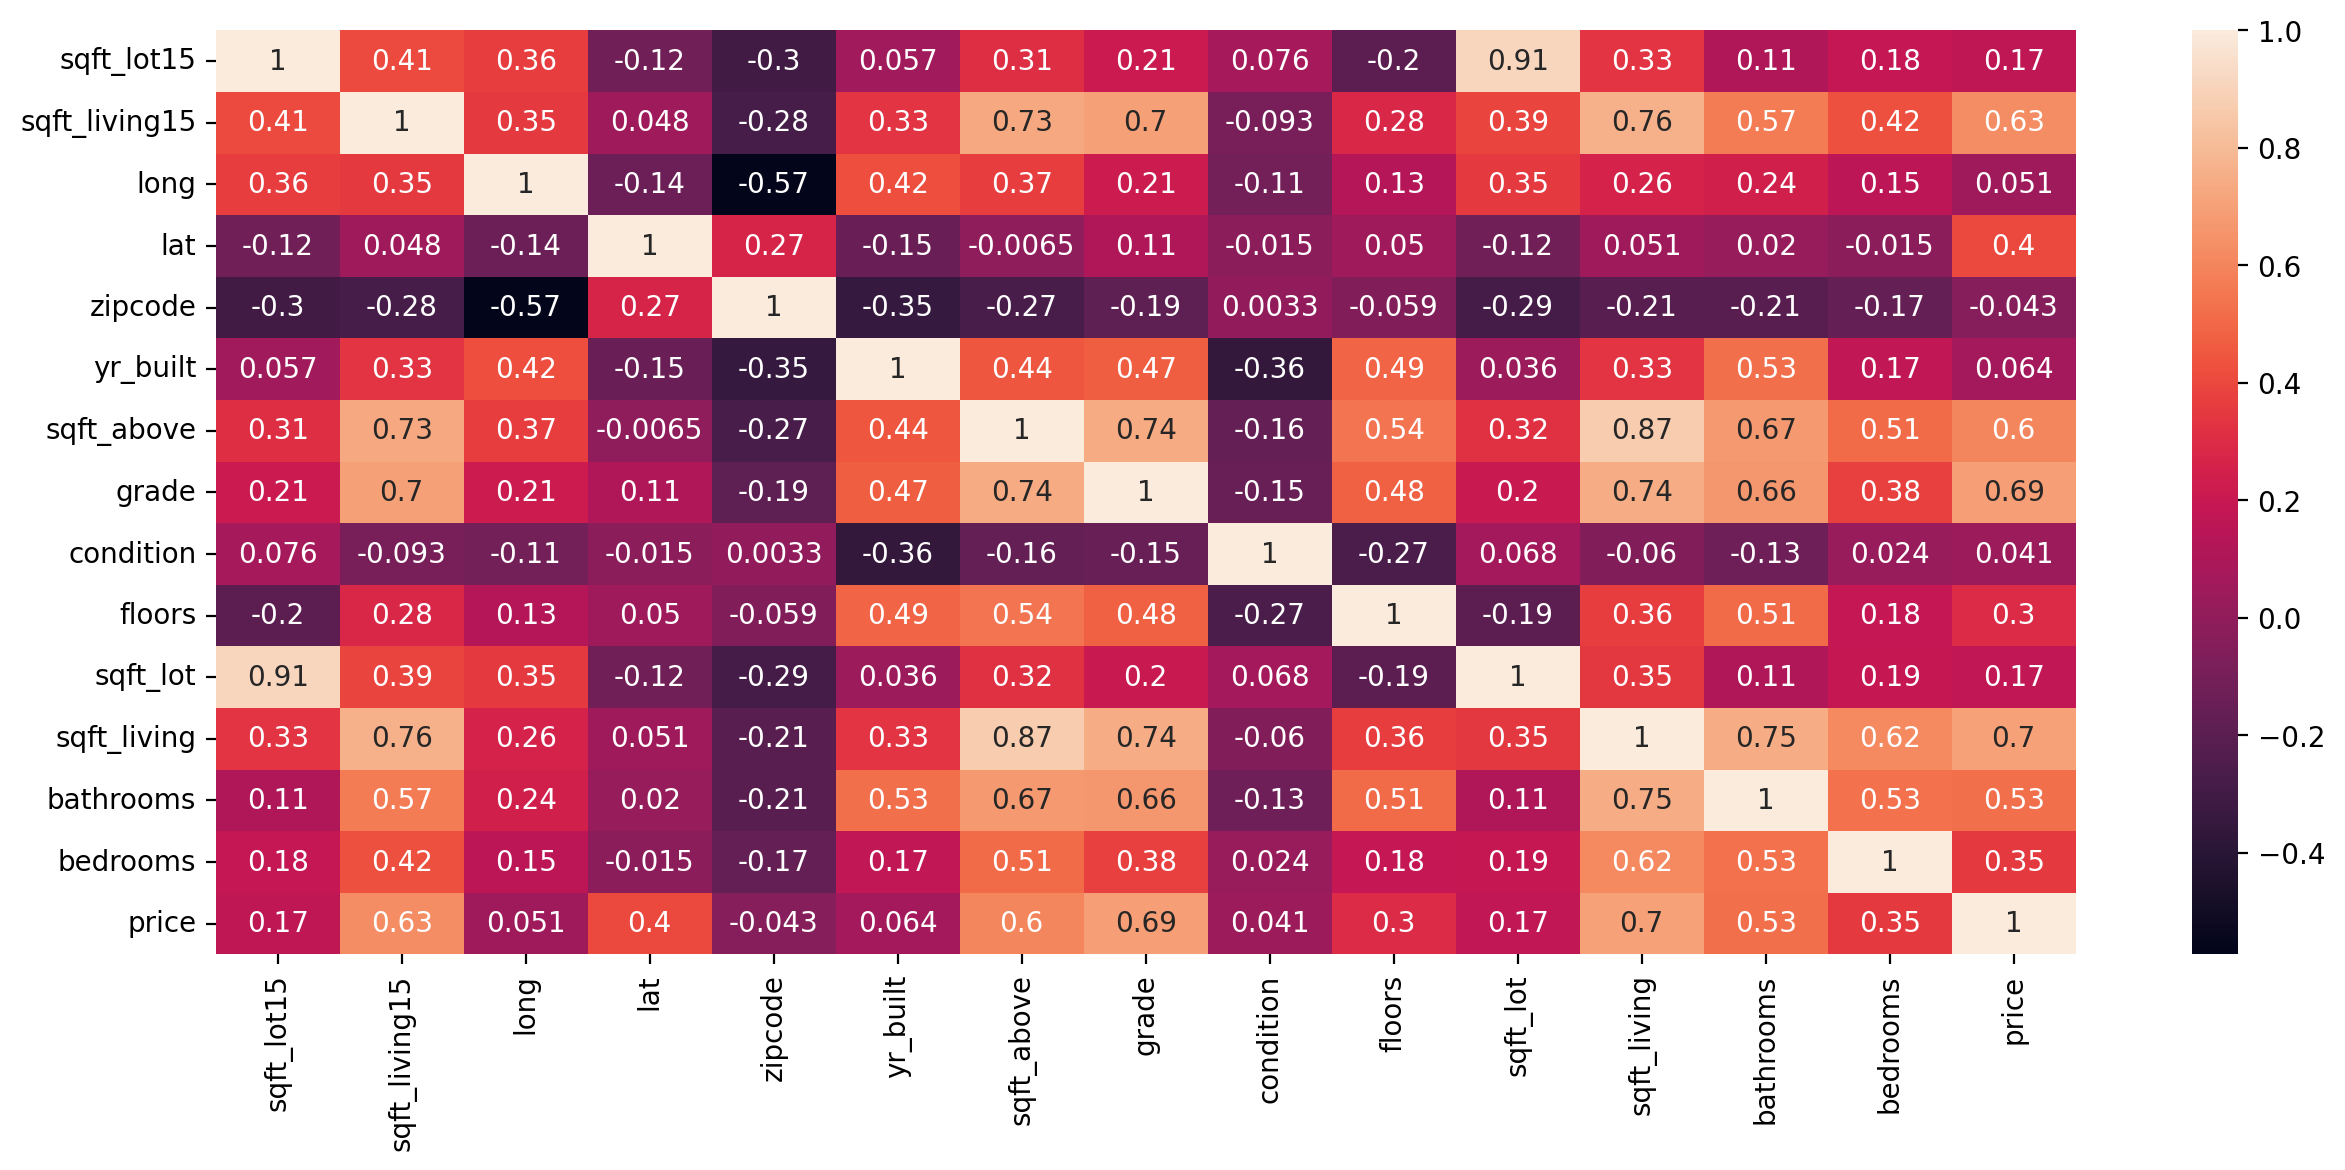

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns 
plt.figure(figsize=(15,6))
sns.heatmap(sm.corr(),annot=True)

คำสั่งแบ่งข้อมูลไปเก็บไว้ในตัวแปร X และ y ดังนี้ 
X = sm.iloc[:,:-1].to_numpy() หรือจะใช้ .values ก็ได้ หมายความว่าเอาข้อมูลมาทั้งหมดทุกแถว (:) ส่วนคอลัมน์เอามาทั้งหมดทุกคอลัมน์ยกเว้นคอลัมน์สุดท้ายไม่ต้องเอามา (,:-1)

y = sm.iloc[:,-1].to_numpy() หรือจะใช้ .values ก็ได้ หมายความว่าเอาข้อมูลมาทั้งหมดทุกแถว (:) และคอลัมน์เอามาเฉพาะคอลัมน์สุดท้าย ส่วนคอลัมน์อื่นๆ ไม่ต้องเอามา (,-1)

คำว่า -1 คือ index การนับลำดับข้อมูลจากข้างหลังมาข้างหน้า เช่น -1,-2,-3,... ถ้านับลำดับข้อมูลจากข้างหน้าไปข้างหลังจะเริ่มที่ 0 คือ 0,1,2,3,...

ส่วนการแปลง .to_numpy() หรือ .values คือการแปลงข้อมูลจาก pandas object ไปเป็น NumPy array

NumPy array อาจเป็น vector, matrix หรือ tensor ก็ได้ ขึ้นอยู่กับมิติ (shape) ของข้อมูล ดังนี้
1.ถ้าเป็นข้อมูลอะเรย์ 1 มิติ (1D array) เรียกว่า vector
2.ถ้าเป็นข้อมูลอะเรย์ 2 มิติ (2D array) เรียกว่า matrix
3.ถ้าเป็นข้อมูลอะเรย์มากกว่า 2 มิติ (มากกว่า 2D array) เรียกว่า tensor

In [46]:
# X = sm.drop('price', axis=1)
# y = sm['price']
# print(X)
# print(y)

X = sm.iloc[:,:-1].to_numpy() #หรือจะใช้ .values ก็ได้
y = sm.iloc[:,-1].to_numpy() #หรือจะใช้ .values ก็ได้

print('ข้อมูล X:', X)
print('\nข้อมูล y:', y)

ข้อมูล X: [[ 5.65000e+03  1.34000e+03 -1.22257e+02 ...  1.18000e+03  1.00000e+00
   3.00000e+00]
 [ 7.63900e+03  1.69000e+03 -1.22319e+02 ...  2.57000e+03  2.25000e+00
   3.00000e+00]
 [ 8.06200e+03  2.72000e+03 -1.22233e+02 ...  7.70000e+02  1.00000e+00
   2.00000e+00]
 ...
 [ 2.00700e+03  1.02000e+03 -1.22299e+02 ...  1.02000e+03  7.50000e-01
   2.00000e+00]
 [ 1.28700e+03  1.41000e+03 -1.22069e+02 ...  1.60000e+03  2.50000e+00
   3.00000e+00]
 [ 1.35700e+03  1.02000e+03 -1.22299e+02 ...  1.02000e+03  7.50000e-01
   2.00000e+00]]

ข้อมูล y: [221900. 538000. 180000. ... 402101. 400000. 325000.]


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

print('แสดงข้อมูล X_train:\n',X_train)
print('\nแสดงข้อมูล X_test:\n',X_test)

แสดงข้อมูล X_train:
 [[ 8.60600e+03  2.35000e+03 -1.22009e+02 ...  1.85000e+03  2.50000e+00
   3.00000e+00]
 [ 5.45000e+03  2.97000e+03 -1.22114e+02 ...  2.49000e+03  2.50000e+00
   4.00000e+00]
 [ 4.66000e+03  2.55000e+03 -1.22153e+02 ...  2.55000e+03  2.50000e+00
   4.00000e+00]
 ...
 [ 1.39170e+04  3.55000e+03 -1.22228e+02 ...  4.23450e+03  3.25000e+00
   5.00000e+00]
 [ 8.75000e+03  1.39000e+03 -1.22322e+02 ...  1.30000e+03  1.00000e+00
   3.00000e+00]
 [ 4.59000e+03  1.50000e+03 -1.22311e+02 ...  1.04000e+03  1.00000e+00
   2.00000e+00]]

แสดงข้อมูล X_test:
 [[ 1.75575e+04  1.62000e+03 -1.22089e+02 ...  2.79000e+03  3.00000e+00
   5.00000e+00]
 [ 8.37900e+03  1.72000e+03 -1.22163e+02 ...  1.48000e+03  1.75000e+00
   3.00000e+00]
 [ 1.62000e+04  3.56000e+03 -1.22216e+02 ...  4.01000e+03  3.50000e+00
   5.50000e+00]
 ...
 [ 9.76000e+02  1.14000e+03 -1.22375e+02 ...  1.14000e+03  2.25000e+00
   3.00000e+00]
 [ 6.02200e+03  1.63000e+03 -1.22400e+02 ...  1.86000e+03  1.75000e+00
   3.0

StandardScaler การปรับข้อมูลให้มีหน่วยเท่ากัน คือมีค่าเฉลี่ยเป็น 0 และมีค่าเบี่ยงเบนมาตรฐานเป็น 1

In [48]:
#StandardScaler การปรับข้อมูลให้มีหน่วยเท่ากัน คือมีค่าเฉลี่ยเป็น 0 และมีค่าเบี่ยงเบนมาตรฐานเป็น 1
# from sklearn.preprocessing import StandardScaler

# standacaler = StandardScaler()

# X_train = standacaler.fit_transform(X_train)
# X_test = standacaler.transform(X_test)

# print(X_train)
# print(X_test)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

📌 ความหมายของ reshape(-1, 1)

คำสั่งของ NumPy array ที่ใช้เปลี่ยน “รูปร่าง” (shape) ของข้อมูล โดย:
y_predict.reshape(a, b) = เปลี่ยนให้ array กลายเป็นตารางที่มี a แถว และ b คอลัมน์ ถ้าใส่ -1 ลงไป NumPy จะคำนวณจำนวนแถวให้อัตโนมัติ ตามขนาดของข้อมูลเดิม
ดังนั้น y_predict.reshape(-1, 1) = เปลี่ยนให้ array เป็น คอลัมน์เวกเตอร์ (มีหลายแถว แต่มี 1 คอลัมน์)

In [50]:
# แปลงข้อมูล array ให้เป็น vector (-1, มีหลายแถว มี 1 คอลัมน์)
y_predict.reshape(-1, 1)

array([[421071.15396982],
       [327869.3471356 ],
       [910984.04219522],
       ...,
       [243595.65060054],
       [557298.26113141],
       [386910.44803407]])

การประเมินโมเดล Regression มี 4 แบบ ดังนี้ 
1) Mean Absolute Error (MAE) การหาผลรวมระยะคลาดเคลื่อน คือหาว่าโมเดลมีความแม่นยำในการพยากรณ์มากน้อยเพียงใด ถ้า MAE มีค่าน้อยแสดงว่าคลาดเคลื่อนน้อย หมายความว่าโมเดลมีความแม่นยำสูง แต่ถ้าค่า MAE มาก แสดงว่าโมเดลมีความคลาดเคลื่อนมาก คือโมเดลมีความแม่นยำน้อย 
2) Mean Squared Error (MSE) การหาผลรวมระยะคลาดเคลื่อนด้วยวิธียกกำลังสอง การแปลผลเหมือนกับข้อ 1
3) Root Mean Squared Error (RMSE) การหาผลรวมระยะคลาดเคลื่อนด้วยวิธีการถอดรูทรากที่สอง การแปลผลเหมือนกับข้อ 1
4) Coefficients of Determination การหาค่าสัมประสิทธิ์การตัดสินใจ หรือ R square (R2) มีค่าระหว่าง 0 - 1 ถ้าค่าเข้าใกล้ 1 หรือเท่ากับ 1 แสดงว่าโมเดลมีความแม่นยำสูง แต่ถ้าค่าเข้าใกล้ 0 แสดงว่าโมเดลมีความแม่นยำต่ำ

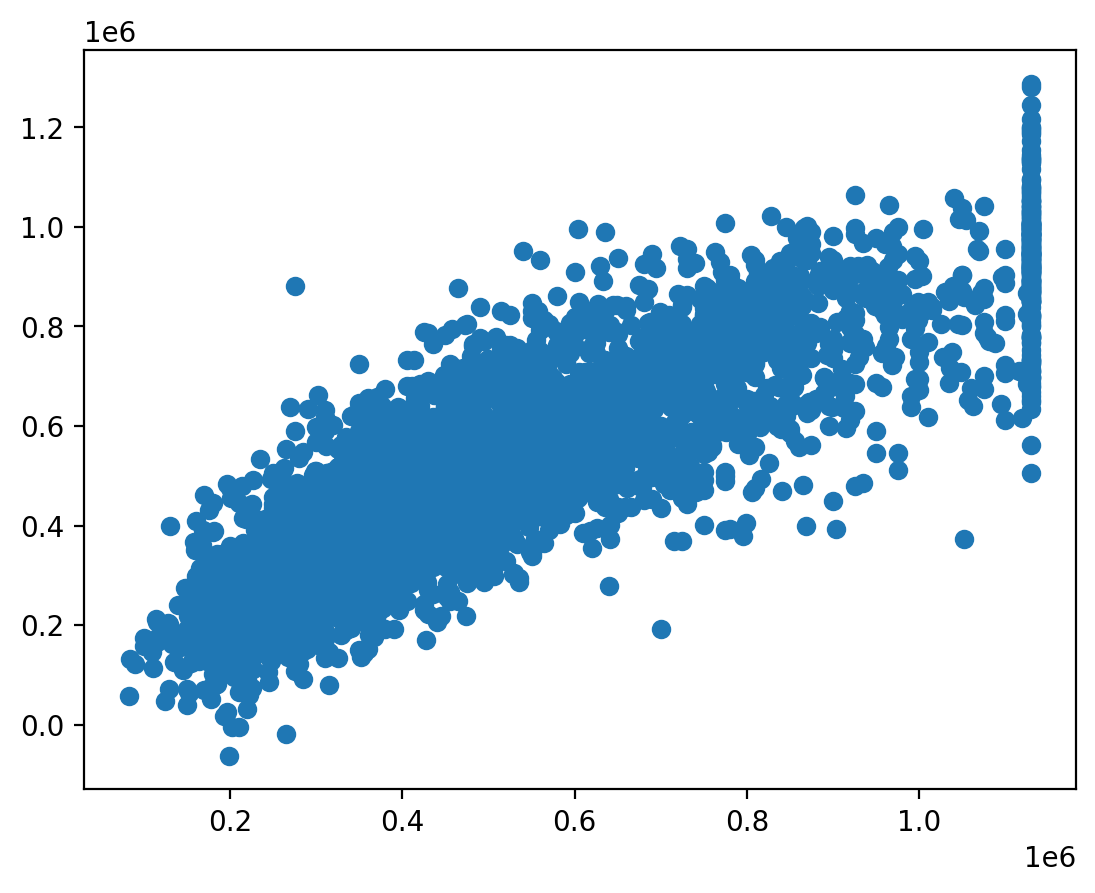

In [51]:
plt.scatter(y_test,y_predict)
plt.show()

In [52]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('ผลรวมระยะคลาดเคลื่อน (MAE) เท่ากับ', mean_absolute_error(y_test, y_predict))
print('ผลรวมระยะคลาดเคลื่อนด้วยวิธียกกำลังสอง (MSE) เท่ากับ', mean_squared_error(y_test, y_predict))
print('ผลรวมระยะคลาดเคลื่อนด้วยวิธีการถอดรูทรากที่สอง (RMSE) เท่ากับ', np.sqrt(mean_squared_error(y_test, y_predict)))
print('การหาค่าสัมประสิทธิ์การตัดสินใจ หรือ R square (R2) เท่ากับ', model.score(X_train, y_train))
print('การหาค่าสัมประสิทธิ์การตัดสินใจ หรือ R square (R2) เท่ากับ', model.score(X, y))

ผลรวมระยะคลาดเคลื่อน (MAE) เท่ากับ 100310.02062174657
ผลรวมระยะคลาดเคลื่อนด้วยวิธียกกำลังสอง (MSE) เท่ากับ 17154665727.336752
ผลรวมระยะคลาดเคลื่อนด้วยวิธีการถอดรูทรากที่สอง (RMSE) เท่ากับ 130975.82115542071
การหาค่าสัมประสิทธิ์การตัดสินใจ หรือ R square (R2) เท่ากับ 0.7387959530153705
การหาค่าสัมประสิทธิ์การตัดสินใจ หรือ R square (R2) เท่ากับ 0.7363713614376759


การบันทึกโมเดล เพื่อนำไปใช้งาน หรือนำไปพัฒนาเป็นเว็บแอปพลิเคชันด้วย Django Framework

วิธีที่ 1
from joblib import dump
dump(model, 'model.joblib')

วิธีที่ 2
from pandas import read_csv

Pickle model 
pd.to_pickle(model, 'model.pickle')

Unpickle model 
model = pd.read_pickle('model.pickle')

save the model to disk
import joblib 
filename = 'model.save'
joblib.dump(model, filename)

In [53]:
#conda install -c anaconda scikit-learn
#pip install -U scikit-learn
#from sklearn.externals import joblib
import numpy as np
import joblib

joblib.dump(model, 'kchouse_model.pkl')
model = joblib.load('kchouse_model.pkl')

In [54]:
#การพยากรณ์ราคาบ้าน
pred = model.predict([[7639,1690,-122.319,47.7210,98125,1951,2170,7,3,2.0,7242,2570,2.25,3]]).round(2)
print('การพยากรณ์ราคาบ้าน: ', pred)

การพยากรณ์ราคาบ้าน:  [642844.58]


In [55]:
df.round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,221900.0,3.0,1.00,1180.0,5650,1.0,0,0,3.0,7.0,1180,0,1955,0,98178,47.51,-122.26,1340,5650.0,20141013T000000
1,538000.0,3.0,2.25,2570.0,7242,2.0,0,0,3.0,7.0,2170,400,1951,0,98125,47.72,-122.32,1690,7639.0,20141209T000000
2,180000.0,2.0,1.00,770.0,10000,1.0,0,0,3.0,6.0,770,0,1933,0,98028,47.74,-122.23,2720,8062.0,20150225T000000
3,604000.0,4.0,3.00,1960.0,5000,1.0,0,0,5.0,7.0,1050,910,1965,0,98136,47.52,-122.39,1360,5000.0,20141209T000000
4,510000.0,3.0,2.00,1680.0,8080,1.0,0,0,3.0,8.0,1680,0,1987,0,98074,47.62,-122.04,1800,7503.0,20150218T000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530.0,1131,3.0,0,0,3.0,8.0,1530,0,2009,0,98103,47.70,-122.35,1530,1509.0,20140521T000000
21609,400000.0,4.0,2.50,2310.0,5813,2.0,0,0,3.0,8.0,2310,0,2014,0,98146,47.51,-122.36,1830,7200.0,20150223T000000
21610,402101.0,2.0,0.75,1020.0,1350,2.0,0,0,3.0,7.0,1020,0,2009,0,98144,47.59,-122.30,1020,2007.0,20140623T000000
21611,400000.0,3.0,2.50,1600.0,2388,2.0,0,0,3.0,8.0,1600,0,2004,0,98027,47.53,-122.07,1410,1287.0,20150116T000000


In [56]:
# sqft_lot15 = float(input("กรอกข้อมูลเพื่อพยากรณ์ราคาบ้าน: "))
# sqft_living15 = float(input("กรอกข้อมูลเพื่อพยากรณ์ราคาบ้าน: "))
# long = float(input("กรอกข้อมูลเพื่อพยากรณ์ราคาบ้าน: "))
# lat = float(input("กรอกข้อมูลเพื่อพยากรณ์ราคาบ้าน: "))
# zipcode	= float(input("กรอกข้อมูลเพื่อพยากรณ์ราคาบ้าน: "))
# yr_built = float(input("กรอกข้อมูลเพื่อพยากรณ์ราคาบ้าน: "))
# sqft_above = float(input("กรอกข้อมูลเพื่อพยากรณ์ราคาบ้าน: "))
# grade = float(input("กรอกข้อมูลเพื่อพยากรณ์ราคาบ้าน: "))
# condition = float(input("กรอกข้อมูลเพื่อพยากรณ์ราคาบ้าน: "))
# floors = float(input("กรอกข้อมูลเพื่อพยากรณ์ราคาบ้าน: "))
# sqft_lot = float(input("กรอกข้อมูลเพื่อพยากรณ์ราคาบ้าน: "))
# sqft_living = float(input("กรอกข้อมูลเพื่อพยากรณ์ราคาบ้าน: "))
# bathrooms = float(input("กรอกข้อมูลเพื่อพยากรณ์ราคาบ้าน: "))
# bedrooms = float(input("กรอกข้อมูลเพื่อพยากรณ์ราคาบ้าน: "))

In [57]:
# result = model.predict([[sqft_lot15, sqft_living15, long, lat, zipcode, yr_built, sqft_above, grade, condition, floors, sqft_lot, sqft_living, bathrooms, bedrooms]])
# print("การพยากรณ์ราคาบ้าน:",result.round(2), 'บาท')

การนำข้อมูลที่ฝึกสอนแล้วมารัน OLS Regression Model

In [58]:
# import statsmodels.api as sm
# # create a fitted model & print the summary
# lm = sm.OLS(y_train, X_train).fit()
# print(lm.summary())

Statsmodels: Multiple Linear regression
การรัน Multiple linear regression เป็นข้อมูลที่ไม่ต้องผ่านการฝึกสอนเหมือนในส่วนแรก

In [59]:
ds = pd.read_csv('df_outlier_adjusted.csv')
ds

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,7129300520,221900.0,3.0,1.00,1180.0,5650,1.0,0,0,3.0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650.0,20141013T000000
1,6414100192,538000.0,3.0,2.25,2570.0,7242,2.0,0,0,3.0,...,2170,400,1951,0,98125,47.7210,-122.319,1690,7639.0,20141209T000000
2,5631500400,180000.0,2.0,1.00,770.0,10000,1.0,0,0,3.0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062.0,20150225T000000
3,2487200875,604000.0,4.0,3.00,1960.0,5000,1.0,0,0,5.0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000.0,20141209T000000
4,1954400510,510000.0,3.0,2.00,1680.0,8080,1.0,0,0,3.0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503.0,20150218T000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3.0,2.50,1530.0,1131,3.0,0,0,3.0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509.0,20140521T000000
21609,6600060120,400000.0,4.0,2.50,2310.0,5813,2.0,0,0,3.0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200.0,20150223T000000
21610,1523300141,402101.0,2.0,0.75,1020.0,1350,2.0,0,0,3.0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007.0,20140623T000000
21611,291310100,400000.0,3.0,2.50,1600.0,2388,2.0,0,0,3.0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287.0,20150116T000000


In [60]:
# แสดงตารางที่ตัดค่า outliers ออกแล้ว
df = ds.loc[:,['sqft_lot15','sqft_living15','long','lat','zipcode','yr_built','sqft_above','grade','condition','floors','sqft_lot','sqft_living','bathrooms','bedrooms','price']]
df

,sqft_lot15,sqft_living15,long,lat,zipcode,yr_built,sqft_above,grade,condition,floors,sqft_lot,sqft_living,bathrooms,bedrooms,price
0,5650.0,1340,-122.257,47.5112,98178,1955,1180,7.0,3.0,1.0,5650,1180.0,1.00,3.0,221900.0
1,7639.0,1690,-122.319,47.7210,98125,1951,2170,7.0,3.0,2.0,7242,2570.0,2.25,3.0,538000.0
2,8062.0,2720,-122.233,47.7379,98028,1933,770,6.0,3.0,1.0,10000,770.0,1.00,2.0,180000.0
3,5000.0,1360,-122.393,47.5208,98136,1965,1050,7.0,5.0,1.0,5000,1960.0,3.00,4.0,604000.0
4,7503.0,1800,-122.045,47.6168,98074,1987,1680,8.0,3.0,1.0,8080,1680.0,2.00,3.0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1509.0,1530,-122.346,47.6993,98103,2009,1530,8.0,3.0,3.0,1131,1530.0,2.50,3.0,360000.0
21609,7200.0,1830,-122.362,47.5107,98146,2014,2310,8.0,3.0,2.0,5813,2310.0,2.50,4.0,400000.0
21610,2007.0,1020,-122.299,47.5944,98144,2009,1020,7.0,3.0,2.0,1350,1020.0,0.75,2.0,402101.0
21611,1287.0,1410,-122.069,47.5345,98027,2004,1600,8.0,3.0,2.0,2388,1600.0,2.50,3.0,400000.0


In [61]:
print("แสดงค่า:\n",df.describe().applymap(lambda x: f"{x:,.2f}"))

แสดงค่า:
       sqft_lot15 sqft_living15       long        lat    zipcode   yr_built  \
count  21,613.00     21,613.00  21,613.00  21,613.00  21,613.00  21,613.00   
mean    8,298.15      1,975.11    -122.21      47.56  98,077.94   1,971.01   
std     4,363.48        649.00       0.14       0.14      53.51      29.37   
min       651.00        399.00    -122.52      47.16  98,001.00   1,900.00   
25%     5,100.00      1,490.00    -122.33      47.47  98,033.00   1,951.00   
50%     7,620.00      1,840.00    -122.23      47.57  98,065.00   1,975.00   
75%    10,083.00      2,360.00    -122.12      47.68  98,118.00   1,997.00   
max    17,557.50      3,665.00    -121.82      47.78  98,199.00   2,015.00   

      sqft_above      grade  condition     floors   sqft_lot sqft_living  \
count  21,613.00  21,613.00  21,613.00  21,613.00  21,613.00   21,613.00   
mean    1,769.56       7.60       3.41       1.49   8,705.22    2,058.08   
std       764.03       1.00       0.65       0.54   5,046.4

C:\Users\LAB9210\AppData\Local\Temp\ipykernel_6992\3298179596.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print("แสดงค่า:\n",df.describe().applymap(lambda x: f"{x:,.2f}"))


Correlation หรือ ค่าสหสัมพันธ์
เป็นการดูทิศทางความสัมพันธ์ระหว่างตัวแปร 2 ตัว โดยมี Correlation Coefficient (r) หรือ ค่าสัมประสิทธิ์สหสัมพันธ์ เป็นตัวบ่งชี้ถึงความสัมพันธ์นี้ ซึ่งค่าสัมประสิทธิ์สหสัมพันธ์นี้จะมีค่าอยู่ระหว่าง -1.0 ถึง +1.0 ซึ่งหากมีค่าใกล้ -1.0 นั้นหมายความว่าตัวแปรทั้งสองตัวมีความสัมพันธ์กันอย่างมากในเชิงตรงกันข้าม หากมีค่าใกล้ +1.0 นั้นหมายความว่า ตัวแปรทั้งสองมีความสัมพันธ์กันโดยตรงอย่างมาก และหากมีค่าเป็น 0 นั้นหมายความว่า ตัวแปรทั้งสองตัวไม่มีความสัมพันธ์ต่อกัน

<Axes: >

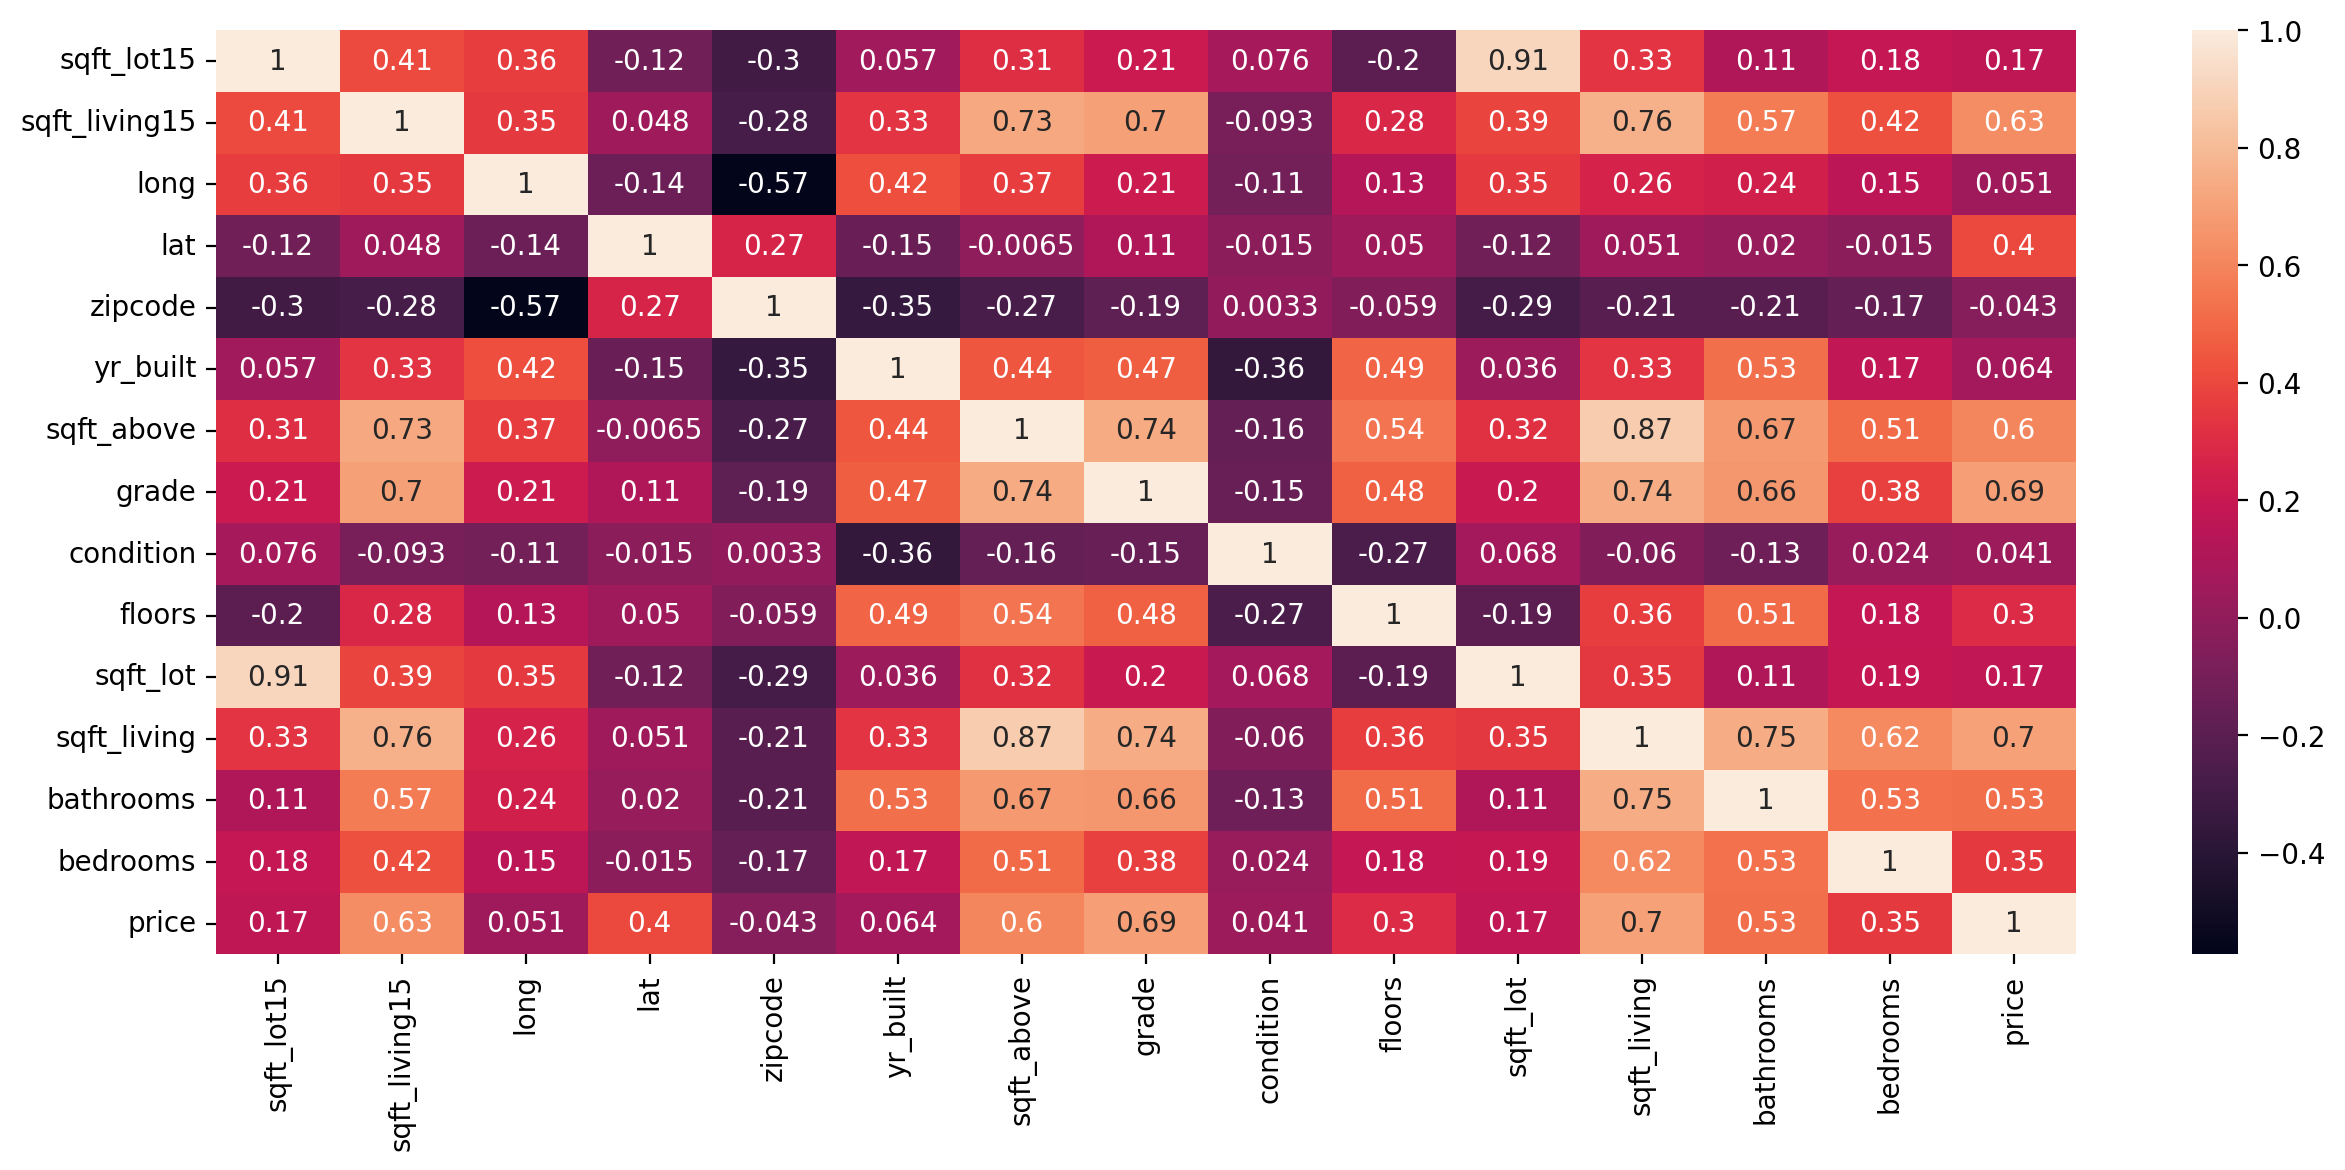

In [62]:
from matplotlib import pyplot as plt
import seaborn as sns 
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

In [63]:
print("ข้อมูลมีคอลัมน์ทั้งหมด",df.columns.shape,"คอลัมน์","ได้แก่\n",df.columns)

ข้อมูลมีคอลัมน์ทั้งหมด (15,) คอลัมน์ ได้แก่
 Index(['sqft_lot15', 'sqft_living15', 'long', 'lat', 'zipcode', 'yr_built',
       'sqft_above', 'grade', 'condition', 'floors', 'sqft_lot', 'sqft_living',
       'bathrooms', 'bedrooms', 'price'],
      dtype='object')


In [64]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [65]:
# formula: response ~ predictor1 + predictor2
model = smf.ols(formula='price ~ sqft_lot15+sqft_living15+long+lat+zipcode+yr_built+sqft_above+grade+condition+floors+sqft_lot+sqft_living+bathrooms+bedrooms', data=df).fit()

In [66]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     4310.
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        15:19:12   Log-Likelihood:            -2.8489e+05
No. Observations:               21613   AIC:                         5.698e+05
Df Residuals:                   21598   BIC:                         5.699e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.713e+06   1.89e+06     -4.086

ตัวอย่างการอธิบายแปลผลข้อมูล

sqft_lot15 พื้นที่บ้านทั้งหมดมีค่าสัมประสิทธิ์เท่ากับ -1.1294 (-1.1294) คือมีค่าเป็นลบ (-1.1294) และค่า p = 0.023 มีค่า < 0.05 แสดงว่าพื้นที่บ้าน คือตัวแปรต้น มีผลต่อราคาบ้าน (price) คือตัวแปรตาม และมีทิศทางในทางลบ (-1.1294) หมายความว่า ถ้าซื้อบ้านที่มีพื้นที่น้อยลงก็จะทำให้ราคาบ้านลดลง ราคาถูกลงตามไปด้วยด้วย คือบ้านราคาถูกลง 

sqft_living15 พื้นที่ใช้สอย (ห้องพักผ่อน/ห้องรับแขก/ห้องนั่งเล่น) มีค่าสัมประสิทธิ์เท่ากับ 61.6172 (61.6172) คือมีค่าเป็นบวก (61.6172) และค่า p = 0.000 มีค่า < 0.05 แสดงว่าพื้นที่ใช้สอย คือตัวแปรต้น มีผลต่อราคาบ้าน (price) คือตัวแปรตาม และมีทิศทางในทางบวก (61.6172) หมายความว่า ถ้าซื้อบ้านที่มีพื้นที่ใช้สอยมากขึ้น/เพิ่มขึ้น ก็จะทำให้ราคาบ้านเพิ่มตามไปด้วย คือบ้านราคาแพงขึ้น

การแปลผลค่า p

1) ถ้าค่า p (P>|t|) < 0.05 แสดงว่ามีความสัมพันธ์กัน/มีผลต่อกัน คือคือตัวแปรต้น (X หรือเหตุ) เป็นสาเหตุ/ส่งผลต่อตัวแปรตาม (Y หรือผล) เช่น กินจุ (เหตุ) ทำให้อ้วน (ผล) ขณะเดียวกัน อ้วน (เหตุ) ทำให้เป็นโรคความดัน เบาหวาน (ผล) เป็นต้น
2) ถ้าค่า p (P>|t|) > 0.05 แสดงว่าไม่มีความสัมพันธ์กัน/มีผลต่อกัน คือคือตัวแปรต้น (X หรือเหตุ) ไม่เป็นสาเหตุ/ไม่ส่งผลต่อตัวแปรตาม (Y หรือผล) เช่น กินจุ (เหตุ) แต่ก็ไม่ทำให้อ้วน (ผล) ขณะเดียวกัน อ้วน (เหตุ) ไม่ทำให้เป็นโรคความดัน เบาหวาน (ผล) เป็นต้น
3) ค่าอย่างมีนัยสำคัญทางสถิติที่..... 
ถ้าค่า p < 0.05 แต่ > 0.01 อย่างมีนัยสำคัญทางสถิติที่ 0.05, 
ถ้าค่า p < 0.01 แต่ > 0.001 อย่างมีนัยสำคัญทางสถิติที่ 0.01, 
ถ้าค่า p < 0.001 อย่างมีนัยสำคัญทางสถิติที่ 0.000

แบบจำลองในการศึกษา 

Y = a + b1x1 + b2x2 + b3x3 + b4x4 + b5x5 + ...b14x14 + e
กำหนดให้
a = ค่าคงที่ความถดถอยพหุ
b1 ... b14 = ค่าสัมประสิทธิถดถอยของตัวแปรอิสระ (ตัวแปรต้น)
Y = price ราคาบ้าน
x1 = sqft_lot15 พื้นที่ทั้งหมดในบริเวณบ้าน
x2 = sqft_living15 พื้นที่ใช้สอยในบ้าน
x3 = long พิกัด Longitude
x4 = lat พิกัด Latitude
x5 = zipcode รหัสไปรษณีย์
e = ค่าความคลาดเคลื่อน 

In [67]:
df

,sqft_lot15,sqft_living15,long,lat,zipcode,yr_built,sqft_above,grade,condition,floors,sqft_lot,sqft_living,bathrooms,bedrooms,price
0,5650.0,1340,-122.257,47.5112,98178,1955,1180,7.0,3.0,1.0,5650,1180.0,1.00,3.0,221900.0
1,7639.0,1690,-122.319,47.7210,98125,1951,2170,7.0,3.0,2.0,7242,2570.0,2.25,3.0,538000.0
2,8062.0,2720,-122.233,47.7379,98028,1933,770,6.0,3.0,1.0,10000,770.0,1.00,2.0,180000.0
3,5000.0,1360,-122.393,47.5208,98136,1965,1050,7.0,5.0,1.0,5000,1960.0,3.00,4.0,604000.0
4,7503.0,1800,-122.045,47.6168,98074,1987,1680,8.0,3.0,1.0,8080,1680.0,2.00,3.0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1509.0,1530,-122.346,47.6993,98103,2009,1530,8.0,3.0,3.0,1131,1530.0,2.50,3.0,360000.0
21609,7200.0,1830,-122.362,47.5107,98146,2014,2310,8.0,3.0,2.0,5813,2310.0,2.50,4.0,400000.0
21610,2007.0,1020,-122.299,47.5944,98144,2009,1020,7.0,3.0,2.0,1350,1020.0,0.75,2.0,402101.0
21611,1287.0,1410,-122.069,47.5345,98027,2004,1600,8.0,3.0,2.0,2388,1600.0,2.50,3.0,400000.0
